<a href="https://colab.research.google.com/github/plaban1981/DEEP-LEARNING-/blob/master/Horse_or_Human_WithAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Upload training data

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2019-07-24 07:05:31--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   189MB/s    in 0.8s    

2019-07-24 07:05:32 (189 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



## Upload Validation Data

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2019-07-24 07:07:43--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2019-07-24 07:07:43 (79.2 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [0]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

##Building a Small Model from Scratch

In [0]:
import tensorflow as tf

In [5]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

W0724 07:36:34.133507 139917540652928 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

## Compile the Model

In [7]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=1e-4),metrics=['accuracy'])

W0724 07:44:42.157269 139917540652928 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Data Augmentation

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

## # Flow training images in batches of 128 using train_datagen generator

In [10]:
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


## # Flow training images in batches of 128 using train_datagen generator

In [11]:
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 256 images belonging to 2 classes.


## Training the model

In [12]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/100
8/8 [==============================] - 25s 3s/step - loss: 0.6830 - acc: 0.5695 - val_loss: 0.6727 - val_acc: 0.5000
Epoch 2/100
8/8 [==============================] - 24s 3s/step - loss: 0.6589 - acc: 0.6374 - val_loss: 0.6286 - val_acc: 0.4961
Epoch 3/100
8/8 [==============================] - 27s 3s/step - loss: 0.6218 - acc: 0.7373 - val_loss: 0.8122 - val_acc: 0.5000
Epoch 4/100
8/8 [==============================] - 21s 3s/step - loss: 0.6435 - acc: 0.6034 - val_loss: 0.6184 - val_acc: 0.5938
Epoch 5/100
8/8 [==============================] - 24s 3s/step - loss: 0.5511 - acc: 0.7642 - val_loss: 0.5578 - val_acc: 0.6992
Epoch 6/100
8/8 [==============================] - 24s 3s/step - loss: 0.5293 - acc: 0.7853 - val_loss: 1.6407 - val_acc: 0.5000
Epoch 7/100
8/8 [==============================] - 28s 3s/step - loss: 0.5564 - acc: 0.7373 - val_loss: 0.6919 - val_acc: 0.5703
Epoch 8/100
8/8 [==============================] - 25s 3s/step - loss: 0.5822 - acc: 0.7275 - val

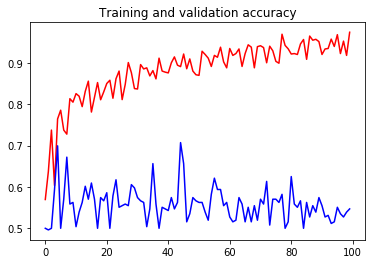

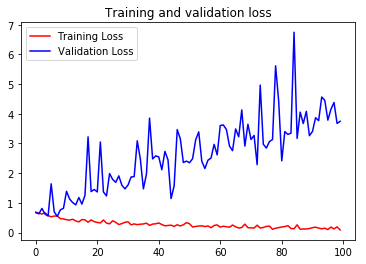

In [13]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Note:
validation accuracy is less as compared to training accuracy as augmentation applied only to training data

In [0]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator( rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


In [18]:
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Retraining the model

In [19]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=25,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/25
8/8 [==============================] - 49s 6s/step - loss: 0.0762 - acc: 0.9700 - val_loss: 3.2787 - val_acc: 0.5254
Epoch 2/25
8/8 [==============================] - 50s 6s/step - loss: 0.4521 - acc: 0.9811 - val_loss: 0.3295 - val_acc: 0.8789
Epoch 3/25
8/8 [==============================] - 49s 6s/step - loss: 0.2831 - acc: 0.9177 - val_loss: 2.4364 - val_acc: 0.5615
Epoch 4/25
8/8 [==============================] - 48s 6s/step - loss: 0.1625 - acc: 0.9533 - val_loss: 2.6156 - val_acc: 0.5400
Epoch 5/25
8/8 [==============================] - 47s 6s/step - loss: 0.0598 - acc: 0.9863 - val_loss: 2.8279 - val_acc: 0.5439
Epoch 6/25
8/8 [==============================] - 44s 6s/step - loss: 0.0478 - acc: 0.9819 - val_loss: 3.6012 - val_acc: 0.5195
Epoch 7/25
8/8 [==============================] - 45s 6s/step - loss: 0.1464 - acc: 0.9644 - val_loss: 6.3631 - val_acc: 0.5000
Epoch 8/25
8/8 [==============================] - 45s 6s/step - loss: 0.2014 - acc: 0.9375 - val_loss: 2